<a href="https://colab.research.google.com/github/honghusldl/learning-pathway/blob/main/simple_neuron_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_points = 500
# cluster centers
centers = [[-0.5,0.5],[0.5,-0.5]]
X,y = datasets.make_circles(n_samples = n_points,
                          random_state = 123,
                          noise = 0.1,
                          factor = 0.2) #factor: the inner circle is 20% of the larger circle in size
# creating clusters randomly

x_data = torch.Tensor(X)
#we need to adjust size of y_data to match rows and columns of predicted values to compute loss
#ValueError: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
#y_data = torch.Tensor(y)
y_data = torch.Tensor(y.reshape(500,1)) # reshape y to 100 rows and 1 col

In [17]:
X[0:5]

array([[ 0.69855363, -0.37828961],
       [-0.24842242,  0.19107122],
       [-0.17875904,  0.25369748],
       [-0.00730467, -0.25926669],
       [-0.15984414,  0.26691592]])

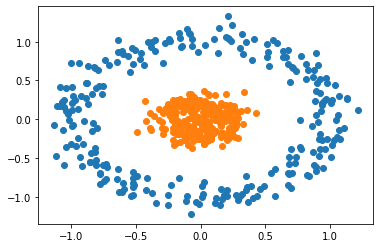

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0],X[y==1, 1])

scatter_plot()

In [8]:
class Model(nn.Module):
  def __init__(self,input_size, H1, output_size): # H1 is hidden layer
    super().__init__()
    self.linear = nn.Linear(input_size,H1)
    self.linear2 = nn.Linear(H1,output_size) # hidden layer connecting to output
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [9]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [13]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
# adam optimizer:adaptive learning algorithm
# automatically compute adaptive learning rate for each parameter

In [14]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data) # use criterion to compute loss
  print("epoch:", i, "loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward() # derivative, or gradient of lost function 
  optimizer.step()

epoch: 0 loss 0.0161893330514431
epoch: 1 loss 0.01540745235979557
epoch: 2 loss 0.014670368283987045
epoch: 3 loss 0.014010471291840076
epoch: 4 loss 0.01334321778267622
epoch: 5 loss 0.012718494050204754
epoch: 6 loss 0.012134247459471226
epoch: 7 loss 0.011565914377570152
epoch: 8 loss 0.01103976834565401
epoch: 9 loss 0.01055265311151743
epoch: 10 loss 0.010085728019475937
epoch: 11 loss 0.009642114862799644
epoch: 12 loss 0.00922506581991911
epoch: 13 loss 0.008827869780361652
epoch: 14 loss 0.008451047353446484
epoch: 15 loss 0.008099757134914398
epoch: 16 loss 0.007770661264657974
epoch: 17 loss 0.0074575855396687984
epoch: 18 loss 0.007160408888012171
epoch: 19 loss 0.006880652159452438
epoch: 20 loss 0.006616375874727964
epoch: 21 loss 0.006365241017192602
epoch: 22 loss 0.006127600558102131
epoch: 23 loss 0.005904094781726599
epoch: 24 loss 0.005693221930414438
epoch: 25 loss 0.005493026226758957
epoch: 26 loss 0.005302958656102419
epoch: 27 loss 0.005122941918671131
epoch: 2

Text(0.5, 0, 'epoch')

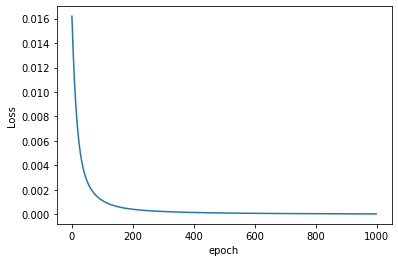

In [15]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [26]:
def plot_decision_boundary(X,y):
  # first, fix the range of x axis
  x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0]+0.25)) 
  # return 50 equally distributed value in range of min/max value of the first column
  
  y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1]+0.25))

  #then create a grid that can contain all data points
  xx,yy = np.meshgrid(x_span,y_span)
  # convert 3*3 grid to 1 dimensional
  # then concat to original 50*50 data grid
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid) # train the entire grid and return prediction
  z = pred_func.view(xx.shape).detach().numpy() # magnitude of probability of each corresponding coordinate
  plt.contourf(xx,yy,z)

  

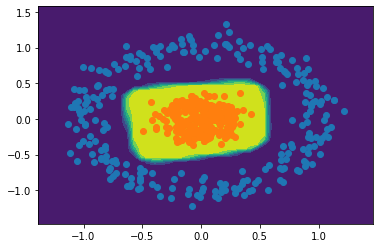

In [27]:
plot_decision_boundary(X,y)
scatter_plot()

prediction is 1


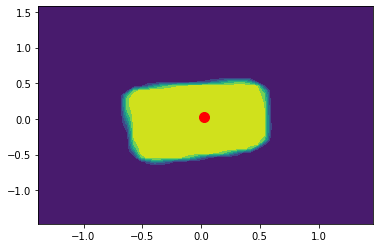

In [28]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color ='red')
print("prediction is", prediction)
plot_decision_boundary(X,y)